# 0.0 Importações 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from IPython.display import Image

# 1.0 Descrição dos Dados

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df['age'] = df['age'].apply( lambda x: round(x/365))

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,53.338686,6.765294,30.0,48.00,54.0,58.00,65.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


## 1.2 Verificando valores faltantes

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.3 Tratamento de Outliers

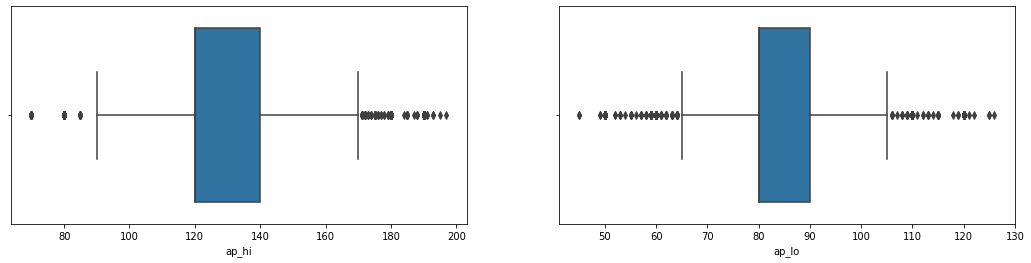

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

df1 = df[(df['ap_hi'] > 40) & (df['ap_hi'] < 200)]
df1 = df1[(df1['ap_lo'] > 40) & (df1['ap_lo'] < 130)]

sns.boxplot(x=df1['ap_hi'], ax=ax[0])
sns.boxplot(x=df1['ap_lo'], ax=ax[1])

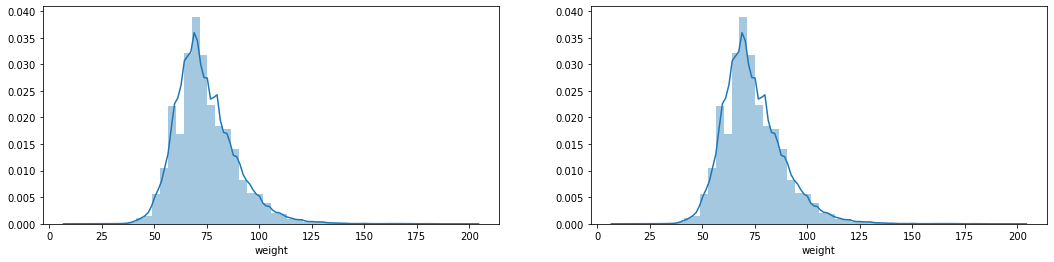

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df1['weight'], ax=ax[0])
sns.distplot(df1['weight'], ax=ax[1])

# 2.0 Mapa Mental de hipoteses 

## 2.1 Mapa mental

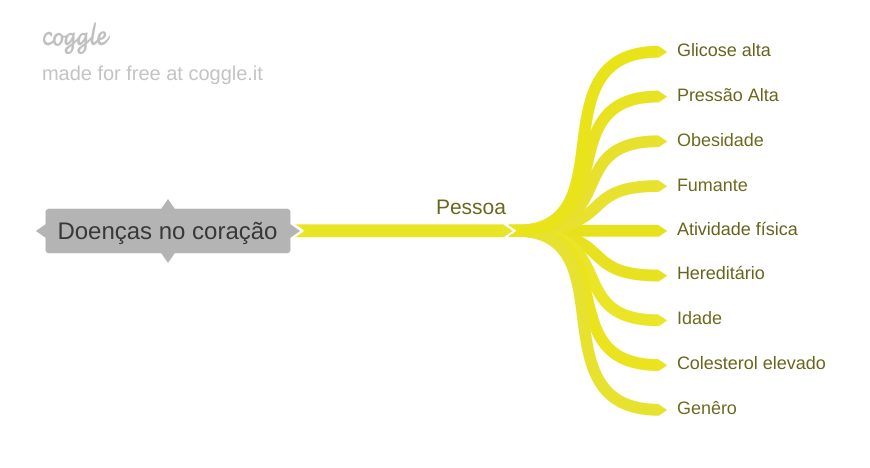

In [10]:
Image ('img\Doenas_no_corao.png')

## 2.2 Correlações 

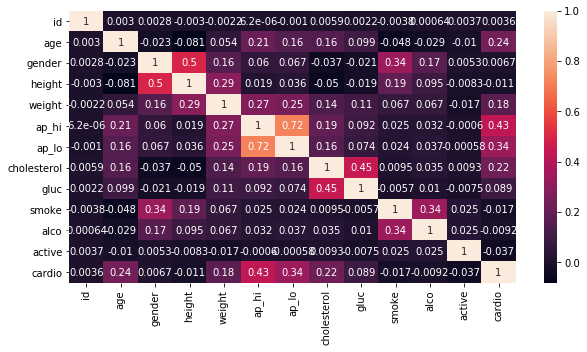

In [42]:
corr = df1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True);

# 3.0 Análise exploratória

### Hipotese 1: A Glicose alta aumenta a chance de ter um problema no coração

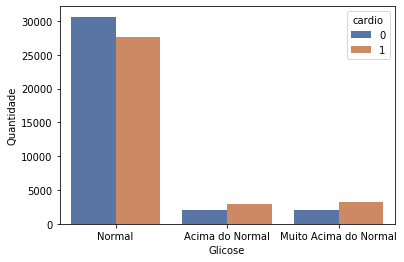

In [71]:
sns.countplot(x = 'gluc', hue = 'cardio', data=df1, palette='deep')
plt.xlabel('Glicose')
plt.ylabel('Quantidade');

#### Falsa - A maioria das pessoas que tem glicose acima do Normal tem problemas no coração, porém muitos que tem a glicose normal também tem problema no coração.

### Hipotese 2: A pressão alta aumenta a chances de ter um problema no coração?

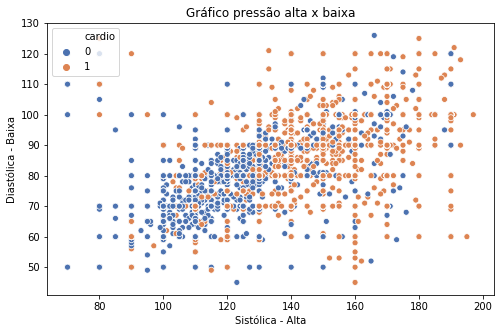

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'ap_hi', y = 'ap_lo', hue = 'cardio', data=df1, palette='deep')
plt.title('Gráfico pressão alta x baixa')
plt.xlabel('Sistólica - Alta')
plt.ylabel('Diastólica - Baixa')
plt.legend(loc='upper left');

#### Verdadeiro - Quanto mais alta a pressão sistólica maiores são os casos de doença no coração

### Hipotese 3: Quem tem problema de obesidade tem mais chances de ter problemas no coração

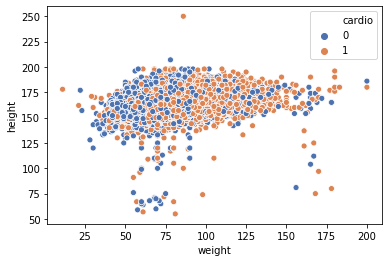

In [15]:
sns.scatterplot(x = 'weight', y = 'height', hue = 'cardio', data=df1, palette='deep')

#### Verdadeiro - Quanto maior o peso, maiores as chances de ter doença no coração. A altura não faz diferença.

### Hipotese 4: Fumantes tem mais chances de ter problema no coração

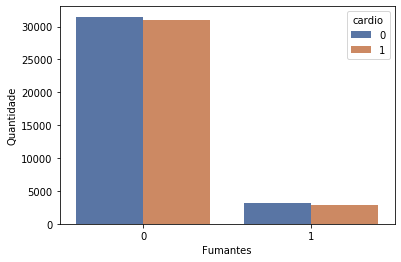

In [74]:
sns.countplot(x = 'smoke', hue = 'cardio', data=df1, palette='deep')
plt.xlabel('Fumantes')
plt.ylabel('Quantidade');

#### Falso - A variavél cigarro sozinha não explica os casos de doenças no coração.

### Hipotese 5: Pessoas que fazem atividade fisíca tem menos chance de ter um problema no coração

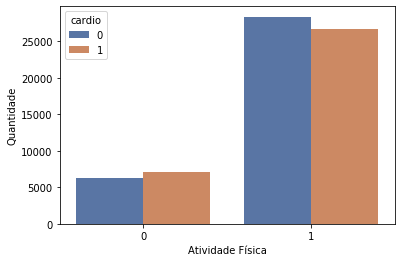

In [72]:
sns.countplot(x = 'active', hue = 'cardio', data=df1, palette='deep')
plt.xlabel('Atividade Física')
plt.ylabel('Quantidade');

#### Falso - Quem faz tividade física somente não tem menos chances de ter um problema no coração.

### Hipotese 6: Quem tem mais idade tem mais chances de ter problema no coração

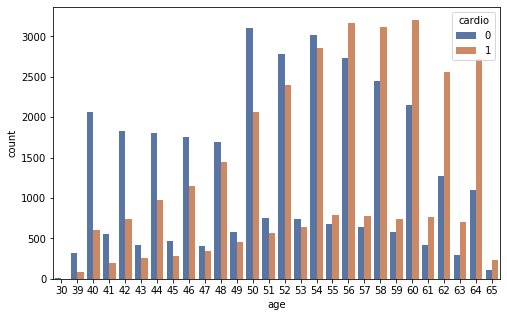

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'age', hue = 'cardio', data=df1, palette='deep')

#### Verdadeiro - Quanto mais idade, mais são os casos de pessoas com doença do coração.

### Hipotese 7: Quem tem colesterol elevado tem mais chances de ter problema no coração

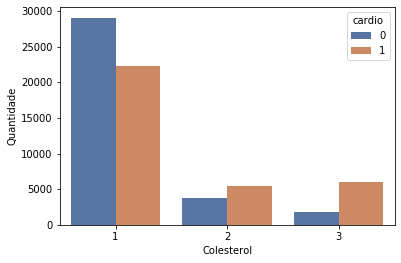

In [70]:
sns.countplot(x = 'cholesterol', hue = 'cardio', data=df1,palette='deep')
plt.xlabel('Colesterol')
plt.ylabel('Quantidade');

#### Verdadeiro - Quanto mais alto o colesterol maiores são os casos de doença no coração

### Hipotese 8: Homens tem mais chances de ter problema no coração

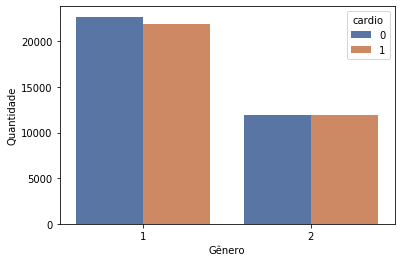

In [73]:
sns.countplot(x = 'gender', hue = 'cardio', data=df1, palette='deep')
plt.xlabel('Gênero')
plt.ylabel('Quantidade');

#### Falso - Homens e mulheres tem a mesma chance de ter problemas no coração.

In [ ]:
df1.shape

In [ ]:
lr = LogisticRegression(max_iter=100000)

In [ ]:
X = df1.drop(['cardio', 'id'], axis=1)
y = df1['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = lr.predict(X_test)